In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_costs(d, n, num_graphs):
    """
        Given an input degree 'd' and number of vertices 'n',
        this function will return the list of optimal costs found
        by GUROBI for all 'num_graphs'
    """
    costs = []
    for i in range(1,num_graphs+1):
        filename = f"benchmark_data/G{d}#{n}_{i}.csv"
        with open(filename) as graph_file:
            graph_reader = csv.reader(graph_file, delimiter=',')
            for row in graph_reader:
                _, _, cost, _ = row
                costs.append(float(cost))
                break
    return costs


def sim_results(d, n, num_graphs, costs, alg=''):
    """
        Given an input degree 'd' and number of vertices 'n', the
        optimal costs, and the name of the algorithm 'alg' this function 
        will return the list of costs found by the 'alg' for all 'num_graphs'.
        
        For XQAOA (X = Y Mixer), alg = '',
            XQAOA (XY Mixer), alg = '/XY_QAOA',
            XQAOA (Y Mixer), alg = '/Y_QAOA'.
            
        PS: alg = '' also has the simulation results for the QAOA, MA-QAOA,
            Classical-Relaxed and the Goemans-Williamson Algorithms.
    """
    simulation_dfs = []
    for i in range(1, num_graphs+1):
        graph_name = f"G{d}#{n}_{i}"
        simulation_df = pd.read_csv(f"simulation_data{alg}/{graph_name}.csv");
        simulation_df = simulation_df/costs[i-1]
        simulation_dfs.append(simulation_df)
        
    cost_df = pd.concat(simulation_dfs)
    cost_df = cost_df.reset_index()
    
    return cost_df

In [3]:
# Aggregate all the simulation results for XQAOA (X=Y Mixer), 
# XQAOA (XY Mixer), and the XQAOA (Y Mixer) ansatz.

costs = get_costs(3, 128, 10)
            
xqaoa1_df = sim_results(3, 128, 10, costs)
xqaoa2_df = sim_results(3, 128, 10, costs, '/XY_QAOA')
xqaoa3_df = sim_results(3, 128, 10, costs, '/Y_QAOA')

cost_df = pd.DataFrame()
cost_df["XQAOA"] =  xqaoa1_df["XQAOA"]
cost_df["XY_QAOA"] =  xqaoa2_df["XY_QAOA"]
cost_df["Y_QAOA"] =  xqaoa3_df["XY_QAOA"]

# The following code simply assigns a Graph Instance
# for costs found by the three XQAOA variants.
graph_instance = []

for i in range(1, 11):
    for _ in range(100):
        graph_instance.append(f"G{i}")
        
cost_df["Instance"] = graph_instance

In [4]:
# Convert the above data into a datastructure that is more suitable for plotting with the Seaborn Library.

approx_ratio =  list(cost_df["XQAOA"]) + list(cost_df["Y_QAOA"])  + list(cost_df["XY_QAOA"]) 
graph = list(cost_df["Instance"]) + list(cost_df["Instance"]) + list(cost_df["Instance"])
algorithm = ["XQAOA$^{X=Y}_1$" for _ in range(1000)] + ["XQAOA$^Y_1$" for _ in range(1000)]  + ["XQAOA$^{XY}_1$" for _ in range(1000)] 
xqaoa_variants = pd.DataFrame({"Approximation Ratio": approx_ratio, "Instance": graph, "Mixer": algorithm})

In [5]:
# The following code define the box, whisker, median, and flier colors, and edge thickness and other artistic properties.

capprops = dict(linestyle='-', linewidth=2, color='#3a506b')
boxprops = dict(linewidth=2, edgecolor='#3a506b')
whiskerprops = dict(linewidth=2, color='#3a506b')
medianprops = dict(linewidth=2, color='#3a506b')
flierprops = dict(marker="x", markeredgecolor = '#3a506b', alpha=0.5)
palette1 = sns.color_palette(['#ffb7b2', '#ffdac1', '#b3e5fc'])

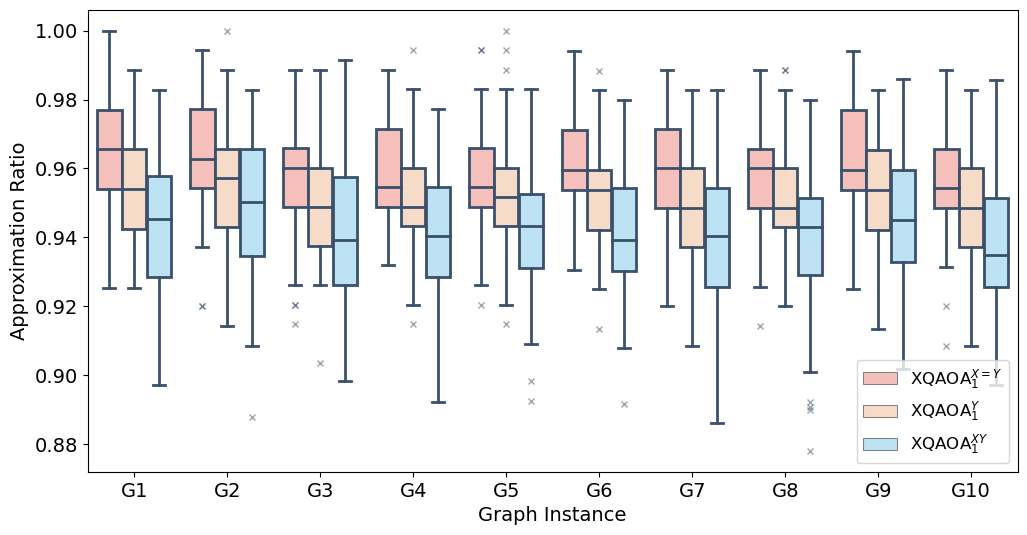

In [6]:
# Generate a Boxplot of the above data using the Seaborn Library.

plt.figure(figsize=(12,6))
sns.boxplot(x="Instance", y="Approximation Ratio", hue="Mixer", palette=palette1, data=xqaoa_variants, showfliers=True,
           flierprops=flierprops, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops = capprops)
plt.legend(loc='lower right', title="Mixer")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Approximation Ratio", fontsize=14)
plt.xlabel("Graph Instance", fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.savefig('XQAOA_Variants.pdf', bbox_inches='tight');
plt.show()

In [7]:
# Aggregate all the simulation results for XQAOA (X=Y Mixer) and
# XQAOA (No Gamma) ansatz and the Classical-Relaxed algorithm.

xqaoa4_df = sim_results(3, 128, 10, costs, '/XQAOA_No_Gamma')

cost_df2 = pd.DataFrame()
cost_df2["XQAOA"] =  xqaoa1_df["XQAOA"]
cost_df2["XQAOA (No Gamma)"] =  xqaoa4_df["XQAOA"] # Excuse the Typo of the column name in the CSV file.
cost_df2["Classical"] =  xqaoa1_df["Classical"]
        
cost_df2["Instance"] = graph_instance

In [8]:
# Convert the above data into a datastructure that is more suitable for plotting with the Seaborn Library.

approx_ratio = list(cost_df2["XQAOA"]) + list(cost_df2["XQAOA (No Gamma)"]) + list(cost_df2["Classical"])
graph = list(cost_df2["Instance"]) + list(cost_df2["Instance"]) + list(cost_df2["Instance"])
algorithm = ["XQAOA$^{X=Y}_1$" for _ in range(1000)] + ["XQAOA$^{X=Y}_1$ ($\gamma = 0$)" for _ in range(1000)] + ["Classical-Relaxed" for _ in range(1000)]

xqaoa_variants2 = pd.DataFrame({"Approximation Ratio": approx_ratio, "Instance": graph, "Algorithm": algorithm})

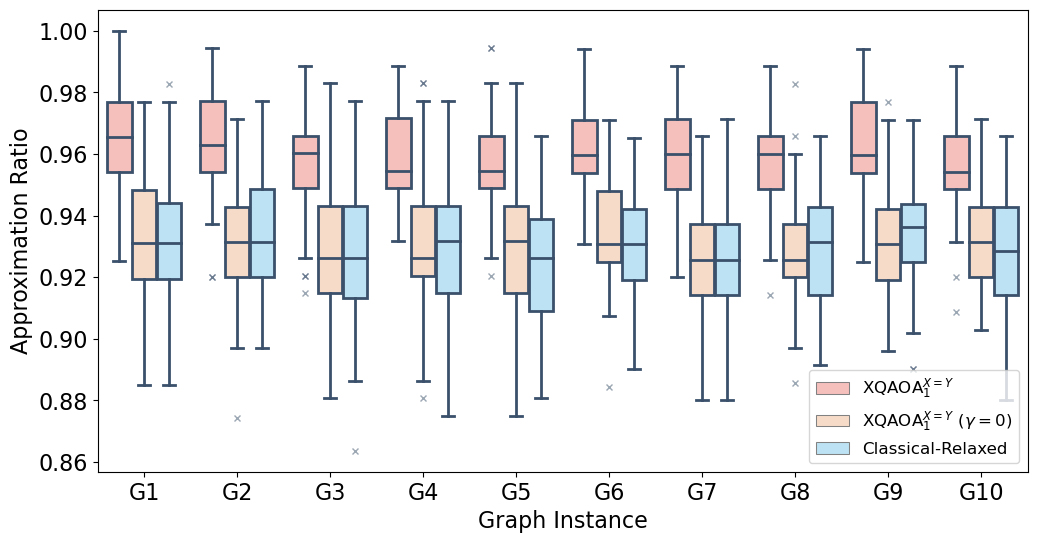

In [9]:
# Generate a Boxplot of the above data using the Seaborn Library.

plt.figure(figsize=(12,6))
sns.boxplot(x="Instance", y="Approximation Ratio", hue="Algorithm", palette=palette1, data=xqaoa_variants2, showfliers=True,
           flierprops=flierprops, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops = capprops)
plt.legend(loc='lower right', title="Algorithm")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Approximation Ratio", fontsize=16)
plt.xlabel("Graph Instance", fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.savefig('XQAOA_No_Gamma.pdf', bbox_inches='tight');
plt.show()

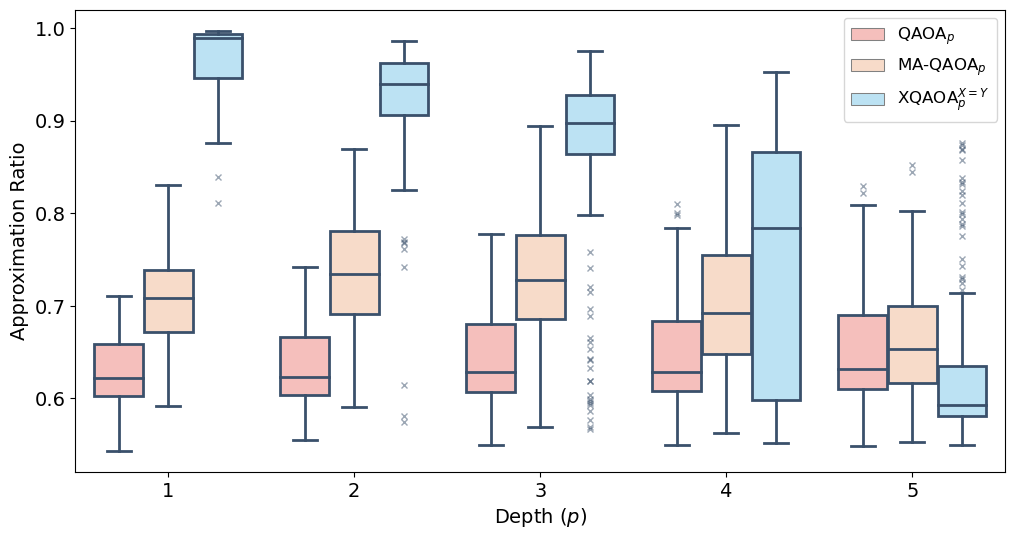

In [11]:
fig7_sim_results = pd.read_csv('simulation_data/FIG7_Dataset/FIG7_Simulation_Data.csv')

boxprops = dict(linewidth=2, edgecolor='#3a506b')
whiskerprops = dict(linewidth=2, color='#3a506b')
medianprops = dict(linewidth=2, color='#3a506b')
capprops = dict(linestyle='-', linewidth=2, color='#3a506b')
flierprops = dict(marker="x", markeredgecolor = '#3a506b', alpha=0.5)
palette1 = sns.color_palette(['#ffb7b2', '#ffdac1', '#b3e5fc'])

# Generate a Boxplot of the above data using the Seaborn Library.

plt.figure(figsize=(12,6))
ax = sns.boxplot(x="Depth", y="AR", hue="Algorithm", palette=palette1, data=fig7_sim_results, showfliers=True, whiskerprops=whiskerprops,
           flierprops=flierprops, boxprops=boxprops, medianprops=medianprops, capprops = capprops)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Approximation Ratio", fontsize=14)
plt.xlabel("Depth $(p)$", fontsize=14)
plt.legend(fontsize=12)
plt.savefig('High_P_Sim_Results.pdf', bbox_inches='tight');
plt.show()